# Example 1

This notebook computes event rates and event spectra for a few benchmark models

In [28]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
import os
import numpy as np
import pandas as pd

import DarkNews as dn
from DarkNews import const

In [30]:
cmd_string = f"dn_gen --exp=miniboone_fhc --umu5={np.sqrt(1.5e-6):.2g} --umu4={np.sqrt(2.6e-6):.2g} --ud5={np.sqrt(4/11):.2g} --ud4={np.sqrt(7/11):.2g} --chi={np.sqrt(1e-5)} --gD=2 --ud4=0.5 --mzprime=1.25 --m4=0.080 --m5=0.140 --neval=1000 --nint=10 --D_or_M=majorana --log=INFO"
const.subprocess_cmd(cmd_string)

cmd_string = f"dn_gen --exp=miniboone_fhc --umu5={np.sqrt(1.5e-6):.2g} --umu4={np.sqrt(2.6e-6):.2g} --ud5={np.sqrt(4/11):.2g} --ud4={np.sqrt(7/11):.2g} --chi={np.sqrt(1e-5)} --gD=2 --ud4=0.5 --mzprime=1.25 --m4=0.080 --m5=0.140 --neval=1000 --nint=10 --D_or_M=dirac --log=INFO"
const.subprocess_cmd(cmd_string)


# cmd_string = f"dn_gen --exp=miniboone_fhc --umu4={np.sqrt(1e-6):.2g} --ud4={np.sqrt(7/11):.2g} --chi={np.sqrt(5e-6)} --gD=1 --mzprime=1.25 --m4=0.140 --neval=1000 --D_or_M=majorana --log=INFO"
# const.subprocess_cmd(cmd_string)


# cmd_string = f"dn_gen --log=DEBUG --exp=miniboone_fhc --umu4={np.sqrt(9e-7):.2g} --ud4={1} --alpha_epsilon2={2e-10} --alphaD=0.25 --mzprime=0.03 --m4=0.420 --neval=10000 --nint=20 --D_or_M=majorana --log=INFO"
# const.subprocess_cmd(cmd_string)


# cmd_string = f"dn_gen --log=DEBUG --exp=miniboone_fhc --umu4={np.sqrt(9e-7):.2g} --ud4={1} --alpha_epsilon2={2e-10} --alphaD=0.25 --mzprime=0.03 --m4=0.420 --neval=10000 --nint=20 --D_or_M=dirac --log=INFO"
# const.subprocess_cmd(cmd_string)


dn_gen --exp=miniboone_fhc --umu5=0.0012 --umu4=0.0016 --ud5=0.6 --ud4=0.8 --chi=0.0031622776601683794 --gD=2 --ud4=0.5 --mzprime=1.25 --m4=0.080 --m5=0.140 --neval=1000 --nint=10 --D_or_M=majorana --log=INFO


    #########################################################
    #   ______           _        _   _                     #
    #   |  _  \         | |      | \ | |                    #
    #   | | | |__ _ _ __| | __   |  \| | _____      _____   #
    #   | | | / _  | ___| |/ /   | .   |/ _ \ \ /\ / / __|  #
    #   | |/ / (_| | |  |   <    | |\  |  __/\ V  V /\__ \  #
    #   |___/ \__,_|_|  |_|\_\   \_| \_/\___| \_/\_/ |___/  #
    #                                                       #
    #########################################################
    
Theory model used: 3+2 majorana HNL model


Generating helicity conserving upscattering events for:
	nu(mu) + C12 -> N5 +  C12 -> N4 + e+ + e- + C12

decaying N5 using off-shell mediator.
Generating helicity flipping upscatter

In [31]:
df_d = pd.read_pickle('data/miniboone_fhc/3plus2/m5_0.14_m4_0.08_mzprime_1.25_dirac/pandas_df.pckl')
df_m = pd.read_pickle('data/miniboone_fhc/3plus2/m5_0.14_m4_0.08_mzprime_1.25_majorana/pandas_df.pckl')

# df_m = pd.read_pickle('data/miniboone_fhc/3plus1/m4_0.14_mzprime_1.25_majorana/pandas_df.pckl')

# df_d = pd.read_pickle('data/miniboone_fhc/3plus1/m4_0.42_mzprime_0.03_dirac/pandas_df.pckl')
# df_m = pd.read_pickle('data/miniboone_fhc/3plus1/m4_0.42_mzprime_0.03_majorana/pandas_df.pckl')

In [32]:
np.sum(df_d['w_event_rate'])/np.sum(df_m['w_event_rate'])

1.068888913226417

In [33]:
np.sum(df_d['w_decay_rate_0'])/np.sum(df_m['w_decay_rate_0'])

0.39076965642938033

In [34]:
# np.sum(df_d['w_decay_rate_1'])/np.sum(df_m['w_decay_rate_1'])

In [35]:
const.get_decay_rate_in_cm(np.sum(df_d['w_decay_rate_0']))

16.65676584377286

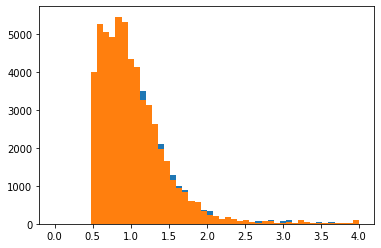

In [36]:
import matplotlib.pyplot as plt

_=plt.hist(df_m['P_projectile','0'], range=(0,4), bins=50, weights=df_m['w_event_rate'])
_=plt.hist(df_d['P_projectile','0'], range=(0,4), bins=50, weights=df_d['w_event_rate'])


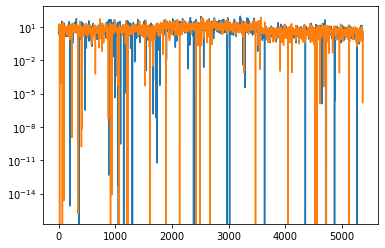

In [40]:
plt.plot(df_d['w_flux_avg_xsec'])
plt.plot(df_m['w_flux_avg_xsec'])
plt.yscale("log")

In [38]:
df_m

P_projectile                     P_decay_N_parent                      \
                0    1    2         3                0         1         2   
0        0.578166  0.0  0.0  0.578166         0.577766  0.091185  0.000004   
1        0.614371  0.0  0.0  0.614371         0.614091  0.051602  0.056026   
2        0.724242  0.0  0.0  0.724242         0.723686  0.003845 -0.109119   
3        0.536532  0.0  0.0  0.536532         0.535990 -0.102337  0.027203   
4        0.655407  0.0  0.0  0.655407         0.655276 -0.050134 -0.010470   
...           ...  ...  ...       ...              ...       ...       ...   
5364     1.483978  0.0  0.0  1.483978         1.342224 -0.143860  0.456914   
5365     1.236115  0.0  0.0  1.236115         1.110746 -0.214053 -0.391109   
5366     1.519127  0.0  0.0  1.519127         1.181174 -0.030628 -0.664452   
5367     1.157543  0.0  0.0  1.157543         1.001812  0.469926  0.106346   
5368     1.192831  0.0  0.0  1.192831         1.104464 -0.148111  0.352293   

                 P_target       ... decay_displacement      w_decay_rate_0  \
             3          0    1  ...                  2    3                  
0     0.553081  11.174864 -0.0  ...                0.0  0.0   2.422171e-20   
1     0.593048  11.174864 -0.0  ...                0.0  0.0   3.708649e-20   
2     0.701569  11.174864 -0.0  ...               -0.0  0.0   1.026595e-20   
3     0.506431  11.174864 -0.0  ...                0.0  0.0   1.627594e-20   
4     0.638094  11.174864 -0.0  ...               -0.0  0.0   6.150798e-20   
...        ...        ...  ...  ...                ...  ...            ...   
5364  1.245993   0.938272 -0.0  ...                0.0  0.0   5.669521e-20   
5365  1.007657   0.938272 -0.0  ...               -0.0  0.0   2.510749e-20   
5366  0.965990   0.938272 -0.0  ...               -0.0  0.0   6.840801e-20   
5367  0.867114   0.938272 -0.0  ...                0.0  0.0   2.165765e-20   
5368  1.026739   0.938272 -0.0  ...                0.0  0.0   2.460747e-20   

     w_event_rate w_flux_avg_xsec        target target_pdgid  \
                                                               
0        5.899749        5.573305           C12   1000060120   
1        7.514067       10.059612           C12   1000060120   
2        3.103391        8.412534           C12   1000060120   
3        4.310840        5.328312           C12   1000060120   
4        7.151182        7.176153           C12   1000060120   
...           ...             ...           ...          ...   
5364     4.213417        3.510446  proton_in_H1         2212   
5365     3.313705        3.274316  proton_in_H1         2212   
5366     2.604183        3.263212  proton_in_H1         2212   
5367     3.101110        2.543897  proton_in_H1         2212   
5368     3.414573        4.011570  proton_in_H1         2212   

     scattering_regime    helicity  \
                                     
0             coherent  conserving   
1             coherent  conserving   
2             coherent  conserving   
3             coherent  conserving   
4             coherent  conserving   
...                ...         ...   
5364              p-el    flipping   
5365              p-el    flipping   
5366              p-el    flipping   
5367              p-el    flipping   
5368              p-el    flipping   

                                     underlying_process  
                                                         
0       nu(mu) + C12 -> N5 +  C12 -> N4 + e+ + e- + C12  
1       nu(mu) + C12 -> N5 +  C12 -> N4 + e+ + e- + C12  
2       nu(mu) + C12 -> N5 +  C12 -> N4 + e+ + e- + C12  
3       nu(mu) + C12 -> N5 +  C12 -> N4 + e+ + e- + C12  
4       nu(mu) + C12 -> N5 +  C12 -> N4 + e+ + e- + C12  
...                                                 ...  
5364  nu(mu) + proton_in_H1 -> N5 +  proton_in_H1 ->...  
5365  nu(mu) + proton_in_H1 -> N5 +  proton_in_H1 ->...  
5366  nu(mu) + proton_in_H1 -> N5 +  proton_in_H1 ->...  
5367  nu(

In [39]:
len(df_m['w_flux_avg_xsec'][df_m['w_flux_avg_xsec'] == 0])

18